<font size="6">Lending Club Loan Project

Author: Maelynn Hunter<br/>
Overview: Use Python machine learning to create a model that predicts whether a borrower will pay back their loan in full

---

Data from LendingClub.com

---

Using lending data from 2007-2010 to classify and predict whether or not the borrower paid back their loan in full.

<font size="4">Columns:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Environment Setup

In [3]:
# data manipulation libraries
import numpy as np
import pandas as pd

In [4]:
# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# visualization settings
sns.set_style('darkgrid', {'axes.linewidth': 1, 'axes.edgecolor':'0.15', 'axes.grid':True, 'xtick.bottom': True, 
                           'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'patch.edgecolor': '0.15'})
sns.set_palette('Pastel1')

# Loading Data

In [6]:
loans = pd.read_csv('loan_data.csv')

In [7]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

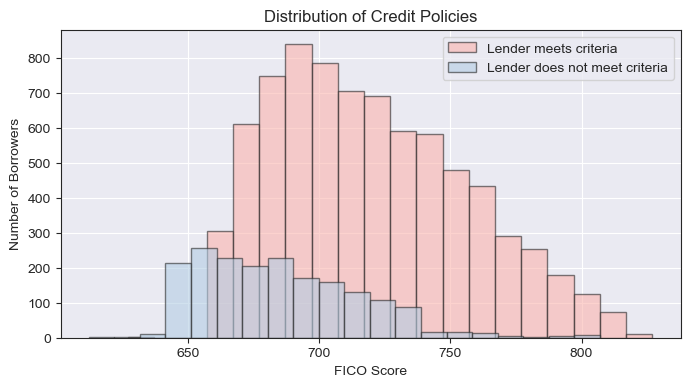

In [47]:
# create plot
plt.figure(figsize=(8,4))

# create histograms
loans[loans['credit.policy']==1]['fico'].hist(bins=20, alpha=0.6, label='Lender meets criteria')
loans[loans['credit.policy']==0]['fico'].hist(bins=20, alpha=0.6, label='Lender does not meet criteria')

# labels
plt.legend()
plt.xlabel('FICO Score')
plt.ylabel('Number of Borrowers')
plt.title('Distribution of Credit Policies');

Borrowers that meet the credit underwriting criteria of LendingClub.com tend to have a higher FICO score.

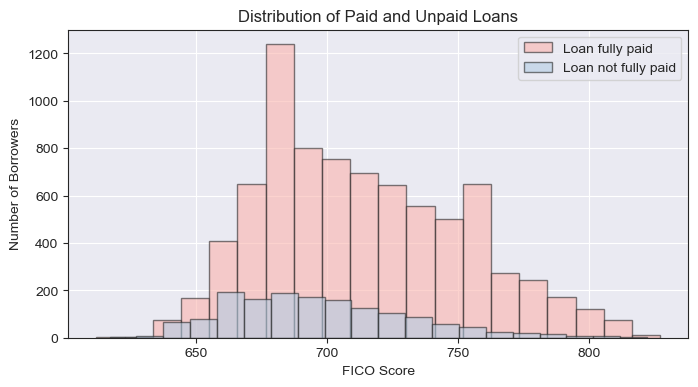

In [46]:
# create plot
plt.figure(figsize=(8,4))

# create histograms
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.6,bins=20,label='Loan fully paid')
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.6,bins=20,label='Loan not fully paid')

# labels
plt.legend()
plt.title('Distribution of Paid and Unpaid Loans')
plt.xlabel('FICO Score')
plt.ylabel('Number of Borrowers');

The average credit score is around 675, regardless of whether borrowers have fully paid off their loans.

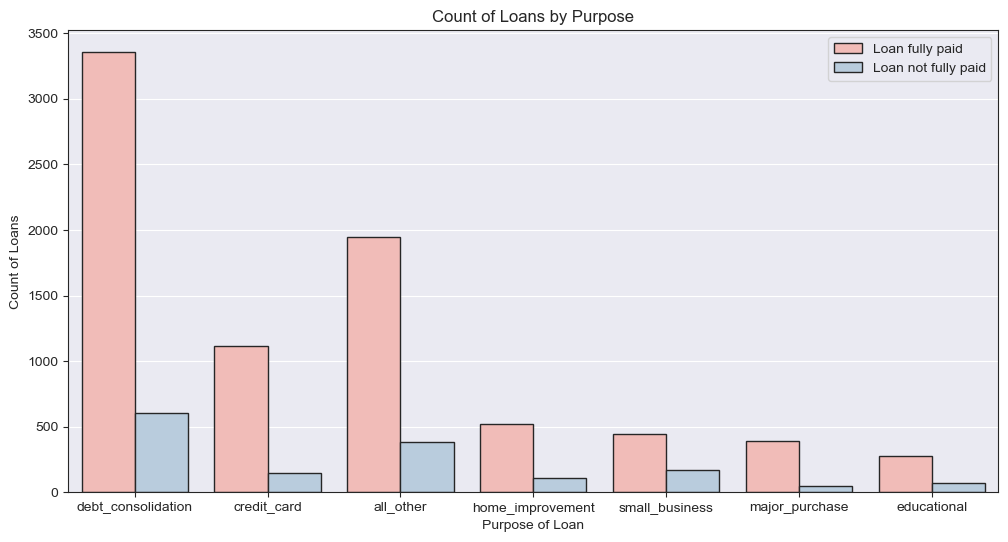

In [58]:
# create plot
plt.figure(figsize=(12,6))

# create countplot
sns.countplot(data=loans, x='purpose', hue='not.fully.paid')

# labels
plt.legend(labels=['Loan fully paid','Loan not fully paid'])
plt.title('Count of Loans by Purpose')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count of Loans');

Most loans are taken out for debt consolidation, and most of all loans are fully paid off.

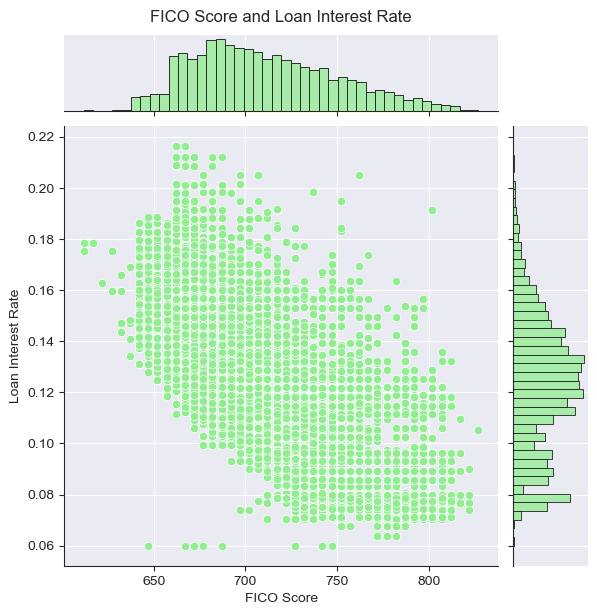

In [111]:
# create jointplot
sns.jointplot(x='fico',y='int.rate',data=loans, color='lightgreen')

# labels
plt.title('FICO Score and Loan Interest Rate', pad=75)
plt.xlabel('FICO Score')
plt.ylabel('Loan Interest Rate');

As borrowers' FICO score increases, their loan interest rates tend to decrease.

# Data Cleaning

Transforming the data into usable features to train the model.

<font size="4">Categorical Features

In [86]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


The purpose column of the dataframe is categorical; we need to transform them to numerical values using dummy variables.

In [87]:
# create another DataFrame that has new feature columns with dummy variables
final_data = pd.get_dummies(data=loans, columns=['purpose'], drop_first=True)

In [89]:
# new DataFrame
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Train/Test Split

Splitting the data into a training set (to train the model) and a testing set (to test how well the model performs).

In [90]:
from sklearn.model_selection import train_test_split

In [92]:
# features
X = final_data.drop('not.fully.paid', axis=1)

# target variable
y = final_data['not.fully.paid']

In [112]:
# creating new variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)

# Random Forest Classifier

Scikit-Learn Documentation: A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
# create an instance of Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)

In [115]:
# train model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [116]:
predictions = rfc.predict(X_test)

# Model Evaluation

Evaluating the model to see how well it performed.

In [117]:
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
print(confusion_matrix(y_test, predictions))

[[2654   11]
 [ 486   10]]


The confusion matrix shows that the model made 2654 true negative predictions and 10 true positive predictions. The model made 486 false negative predictions and 11 false positive predictions.

In [119]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      2665
           1       0.48      0.02      0.04       496

    accuracy                           0.84      3161
   macro avg       0.66      0.51      0.48      3161
weighted avg       0.79      0.84      0.78      3161



The classification report shows that the Random Forest Classifier model has an accuracy of 84% in predicting which borrowers will pay back their loans in full.